<center><h2>Importing the Libraries</h2></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<center><h2>Reading the Dataset</h2></center>

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='NAASk6pRpwyrEjOrYAyvhS57VDikhORRt2nLpnhzqHZN',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-zz591uvq0llvol'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<center><h2>Analyse the Data</h2><center>

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.drop(["Serial No."],axis=1,inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<center><h2>Handling Missing Values</h2></center>

In [5]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<center><h2>Data Description</h2></center>

In [6]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


<center><h2>Data Visualisation</h2></center>



###### UNIVARIATE ANALYSIS
<hr style="height:1px;">

In [8]:
from scipy import stats

In [9]:
c=np.random.normal(loc=5,size=100,scale=2)

<small> HISTOGRAM </small>

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

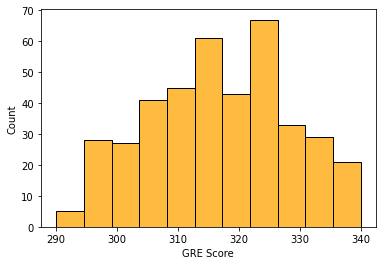

In [10]:
sns.histplot(data["GRE Score"],color='orange')


<AxesSubplot:xlabel='TOEFL Score', ylabel='Count'>

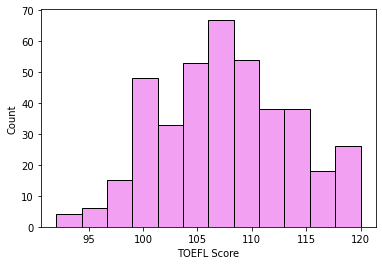

In [11]:
sns.histplot(data["TOEFL Score"],color='violet')

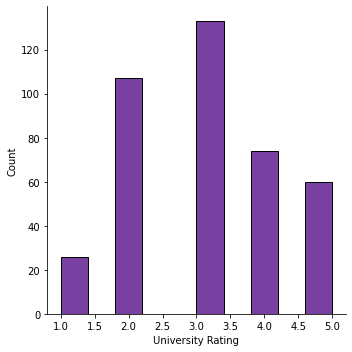

In [12]:
sns.displot(data["University Rating"],color='indigo')

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOEFL Score'>

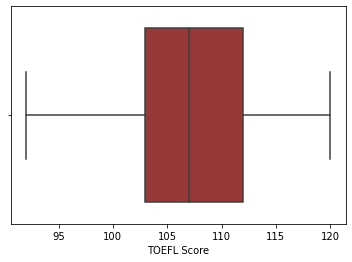

In [13]:
sns.boxplot(data["TOEFL Score"],color='brown')

<small> BOX PLOT </small>

<AxesSubplot:xlabel='University Rating'>

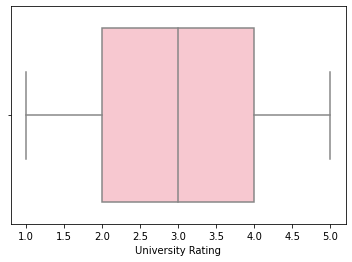

In [14]:
sns.boxplot(x=data['University Rating'],color='pink') 

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

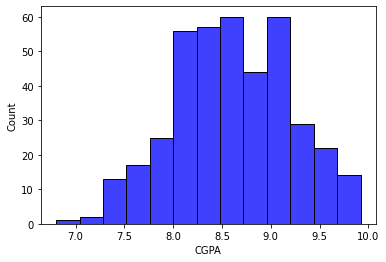

In [15]:
sns.histplot(data.CGPA,color="blue")

<small> COUNT PLOT </small>

<AxesSubplot:xlabel='TOEFL Score', ylabel='count'>

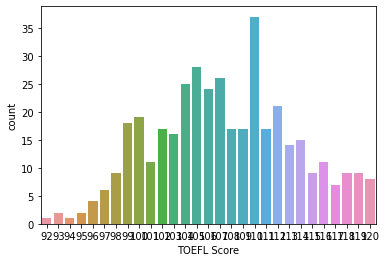

In [16]:
sns.countplot(x=data['TOEFL Score'])

###### BIVARIATE ANALYSIS
<hr style="height:1px;">

<small> BAR PLOT </small>

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

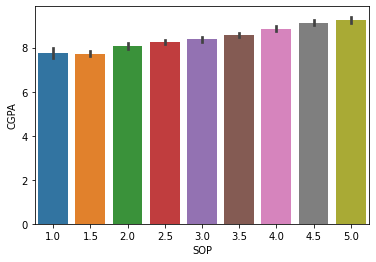

In [17]:
sns.barplot(x=data.SOP,y=data.CGPA)

<small>LINEAR PLOT</small>

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE Score', ylabel='SOP'>

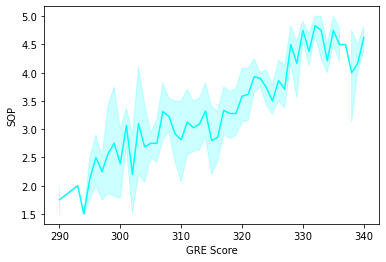

In [18]:
sns.lineplot(data["GRE Score"],data["SOP"], color='aqua')

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

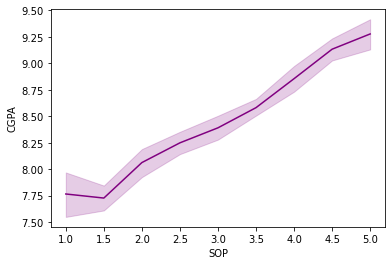

In [19]:
sns.lineplot(x=data.SOP,y=data.CGPA, color='purple')

<small>SCATTER PLOT</small>

<AxesSubplot:xlabel='TOEFL Score', ylabel='University Rating'>

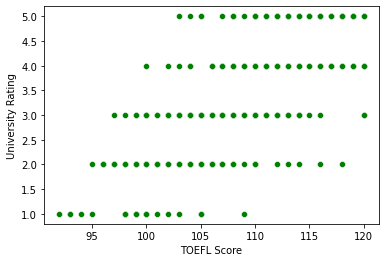

In [20]:
sns.scatterplot(x=data['TOEFL Score'],y=data['University Rating'],color='green')

<small>POINT PLOT</small>

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

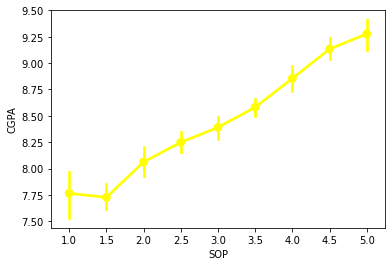

In [21]:
sns.pointplot(x=data['SOP'],y=data['CGPA'],color='yellow')

<small>REG PLOT</small>

<AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>

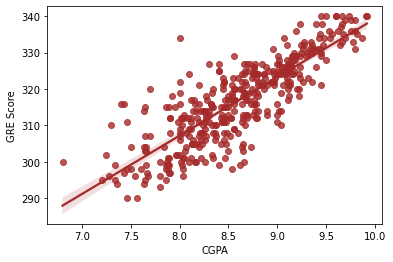

In [22]:
sns.regplot(x=data.CGPA,y=data['GRE Score'],color='Brown') 

<small>RELPLOT</small>

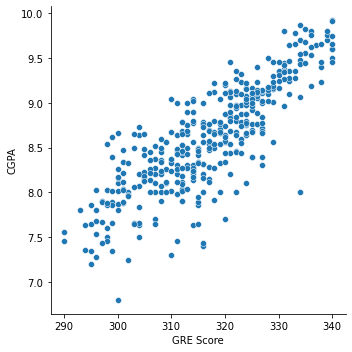

In [23]:
sns.relplot(x="GRE Score",y="CGPA",data=data)

<center><h2>SPLITTING DEPENDENT AND INDEPENDENT COLUMNS</h2></center>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [25]:
x = data[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA", "Research"]]
y = data["Chance of Admit "].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's Score = {:.3f}".format(r2_score_mlr))

Mutiple Linear Regression's Score = 0.821


In [27]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

y_pred_tree = tree_reg.predict(x_test)

r2_score_tree = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's Score = {:.3f}".format(r2_score_tree))

Decision Tree Regression's Score = 0.625


In [28]:
ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=42)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2_score_rfr))

Random Forest Regression's Score = 0.807


/tmp/wsuser/ipykernel_210/252052561.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran_for_reg.fit(x_train,y_train)


<center><h2>SAVING THE MODELS</h2></center>

In [29]:
import pickle
pickle.dump(multiple_lin_reg,open('university.pkl','wb'))
pickle.dump(multiple_lin_reg, open("university_percent.pkl", "wb"))
lr = pickle.load(open("university.pkl", "rb")) #logistic regression model
gd = pickle.load(open("university_percent.pkl", "rb")) #regression model

In [30]:
!pip install ibm_watson_machine_learning

In [31]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url":"https://us-south.ml.cloud.ibm.com",
                    "apikey":"0zRs_HVV9HNSSzHy-sO_y_XWgsYQFlchHxmeakje1g0H"
                  }
client = APIClient(wml_credentials)

In [32]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']== space_name)['metadata']['id'])

In [33]:
space_uid = guid_from_space_name(client,'models')
print("Space UID = " + space_uid)

Space UID = 9e336f88-62ff-44e5-adb1-6d90a573fee9


In [34]:
client.set.default_space(space_uid)

'SUCCESS'

In [35]:
client.software_specifications.list(100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [40]:
software_spec_uid =client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [41]:
model_details = client.repository.store_model(model=lr, meta_props={
     client.repository.ModelMetaNames.NAME: "University_admit",
     client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
     client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0"}
                                             )


In [42]:
model_id = client.repository.get_model_id(model_details)

In [43]:
model_id

'5dd3e7ac-b458-4251-a225-874c6c462031'

In [44]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [45]:
multiple_lin_reg.predict(x_train)

array([[0.74604196],
       [0.73901061],
       [0.99499641],
       [0.71465428],
       [0.58666289],
       [0.70570088],
       [0.79635618],
       [0.72390065],
       [0.91430317],
       [0.65782685],
       [0.60293691],
       [0.84357917],
       [0.49457813],
       [0.72066904],
       [0.61590143],
       [0.63303675],
       [0.73458027],
       [0.77284896],
       [0.54224384],
       [0.7740777 ],
       [0.67388358],
       [0.68770413],
       [0.71751013],
       [0.79218791],
       [0.74689676],
       [0.60135562],
       [0.6550291 ],
       [0.65024192],
       [0.64937148],
       [0.61847543],
       [0.71837168],
       [0.62572932],
       [0.56180503],
       [0.58932197],
       [0.82917531],
       [0.60765804],
       [0.45309083],
       [0.88506537],
       [0.772133  ],
       [0.81857796],
       [0.62930747],
       [0.705755  ],
       [0.6604701 ],
       [0.44720981],
       [0.9565852 ],
       [0.79082941],
       [0.7826623 ],
       [0.656